# Clasificación de flores Iris

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline

In [11]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [12]:
X = iris.data[:, :2]
Y = iris.target

In [19]:
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
h = (x_max - x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Combinamos las x con las y. Hacemos la parrilla de dibujo
X_plot = np.c_[xx.ravel(), yy.ravel()]

In [28]:
C = 1.0
svc = svm.SVC(kernel="linear", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5,1,'SVC para las flores de Iris con Kernel Lineal')

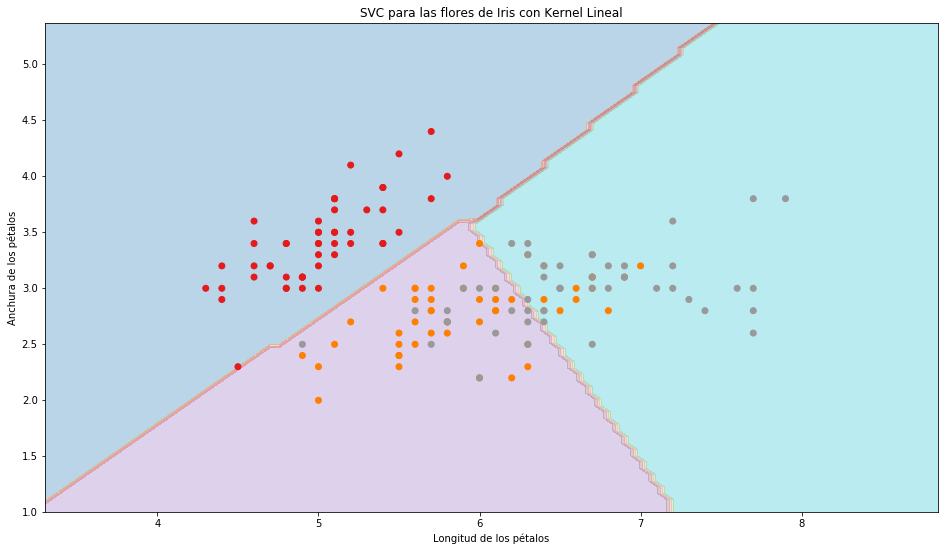

In [36]:
plt.figure(figsize=(16,9))
#Secciones en las que me ha divido el dibujo el SVC
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter (X[:,0], X[:,1], c=Y, cmap=plt.cm.Set1)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Lineal")

Text(0.5,1,'SVC para las flores de Iris con Kernel Radial')

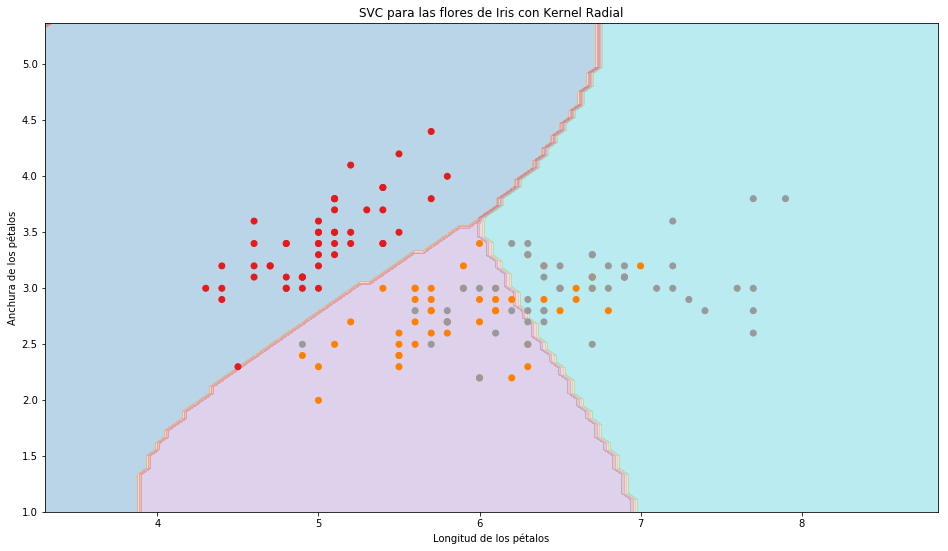

In [38]:
C = 1.0
svc = svm.SVC(kernel="rbf", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

plt.figure(figsize=(16,9))
#Secciones en las que me ha divido el dibujo el SVC
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter (X[:,0], X[:,1], c=Y, cmap=plt.cm.Set1)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Radial")

Text(0.5,1,'SVC para las flores de Iris con Kernel Polinomial')

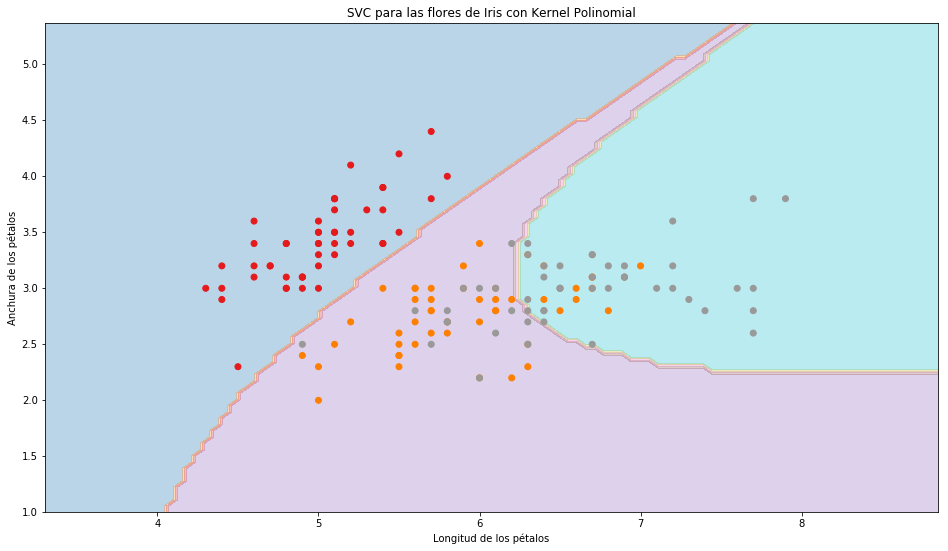

In [42]:
C = 1.0
svc = svm.SVC(kernel="poly", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

plt.figure(figsize=(16,9))
#Secciones en las que me ha divido el dibujo el SVC
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter (X[:,0], X[:,1], c=Y, cmap=plt.cm.Set1)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Polinomial")

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [44]:
X, Y = shuffle(X, Y, random_state = 0)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [47]:
parameters = [
    {
        "kernel": ["rbf"],
        "gamma": [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.5],
        "C": [1, 10, 100, 1000]
    },
    {
        "kernel": ["linear"],
        "C": [1, 10, 100, 1000]
    }
]

In [64]:
clf = GridSearchCV(svm.SVC(decision_function_shape="ovr"), param_grid=parameters, cv=5)
clf.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
clf.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [66]:
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
params = clf.cv_results_["params"]

for m, s, p in zip(means, stds, params):
    print("{:0.3f} +/- {:0.3f} para {}".format(m, 2*s, p))

0.652 +/- 0.112 para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.652 +/- 0.112 para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.652 +/- 0.112 para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.768 +/- 0.232 para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.777 +/- 0.236 para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.804 +/- 0.220 para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.652 +/- 0.112 para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.652 +/- 0.112 para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.786 +/- 0.205 para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.795 +/- 0.233 para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.786 +/- 0.220 para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.804 +/- 0.220 para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.652 +/- 0.112 para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.786 +/- 0.205 para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.812 +/- 0.212 para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.777 +/- 0.212 para {'C': 100, 'gamma': 0.1, 'kernel':

In [67]:
Y_pred = clf.predict(X_test)

In [68]:
print(classification_report(Y_test, Y_pred, target_names=["setosa","versicolor","virginica"]))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        11
 versicolor       0.60      0.82      0.69        11
  virginica       0.83      0.62      0.71        16

avg / total       0.81      0.79      0.79        38

